<h1><center>TASK 1 FUZZY MATCHING ALGORITHM</center>  </h1> 
<h4>Name-Aayush Srivastava <br> Roll No- 23AG10003</h4>

first thing we need to do is check if we have the data in our data frame , I'll use pandas for this , need to make sure openpyxyl is installed.
referred code to extract data:
https://www.geeksforgeeks.org/reading-excel-file-using-python/


In [33]:
# import pandas lib as pd
import pandas as pd

# read by default 1st sheet of an excel file
dataframe1 = pd.read_excel('TaskData.xlsx')

print(dataframe1)


          cokter
0      dentiists
1        Enginir
2         PoLICE
3      engneiear
4         DOcTRO
...          ...
1400     enginir
1401  aCcountANT
1402  accountant
1403      POlIcE
1404    enjineer

[1405 rows x 1 columns]


now that we are set with the data we'll use the Levenshtein distance algorithm to correct the given data 

In [34]:
import pandas as pd

# Function to calculate Levenshtein distance between two strings
def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

# List of correct career options
correct_career_options = [
    "Doctor", "Lawyer", "Teacher", "Engineer", "Accountant",
    "Nurse", "Police", "Architect", "Dentist", "Pharmacist"
]

# Function to correct misspelled career options
def correct_career_option(option):
    min_distance = float('inf')
    corrected_option = option
    for career_option in correct_career_options:
        distance = levenshtein_distance(option.lower(), career_option.lower())
        if distance < min_distance:
            min_distance = distance
            corrected_option = career_option
    return corrected_option

# Read data from the Excel file
data = pd.read_excel('TaskData.xlsx', header=None)

# Name the header of the first column as "Original"
data.columns = ['Original']

# Correct spelling mistakes
data['Corrected'] = data['Original'].apply(correct_career_option)

# Save corrected data to a new Excel file
data.to_excel('CorrectedTaskData.xlsx', index=False)
print(data)


        Original   Corrected
0         cokter      Doctor
1      dentiists     Dentist
2        Enginir    Engineer
3         PoLICE      Police
4      engneiear    Engineer
...          ...         ...
1401     enginir    Engineer
1402  aCcountANT  Accountant
1403  accountant  Accountant
1404      POlIcE      Police
1405    enjineer    Engineer

[1406 rows x 2 columns]


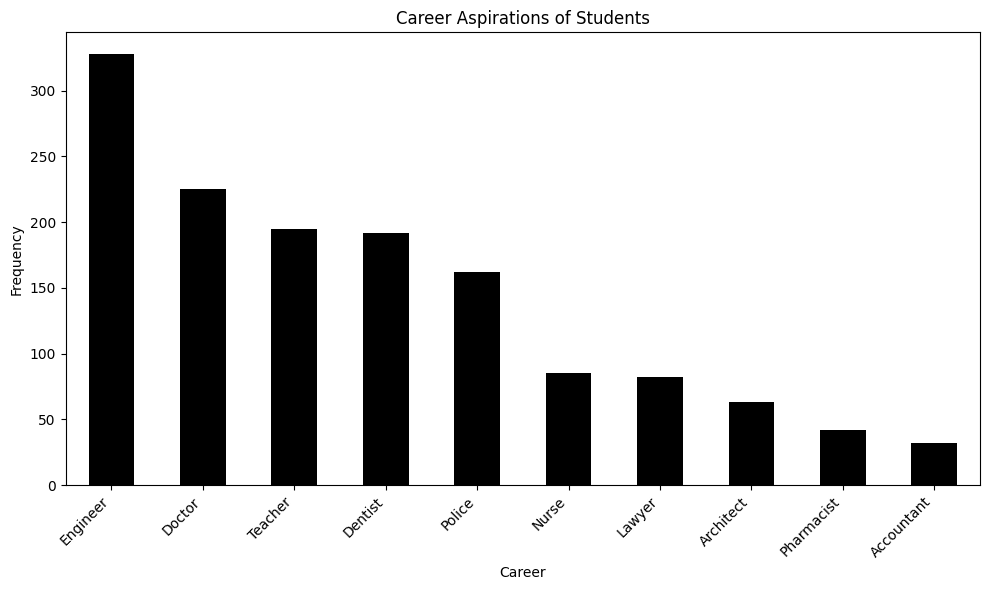

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read corrected data from the Excel file
data = pd.read_excel('CorrectedTaskData.xlsx')

# Count the frequency of each career choice
career_counts = data['Corrected'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
career_counts.plot(kind='bar', color='black')
plt.title('Career Aspirations of Students')
plt.xlabel('Career')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
